In [1]:
%load_ext autoreload
%autoreload 2

1. Sensitivity to seeds: Use the same strict weight with different random seeds. Note the stopping epoch. 
2. Sensitivity to strictness weight: Use different strict weights with the same random seed. Note the stopping epoch.

Cases to consider: 
1. All cases?
2. Only case 3, 11, 21?

In [282]:
from utils.sweep import Sweep
import pickle

strict_weights_sweep_expt = pickle.load(open("results/strict_weights_sweep_expt.pkl", "rb"))

In [283]:
strict_weights = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0]

In [284]:
strict_weights_sweep_expt.keys()

dict_keys(['3', '4', '8', '21', '24'])

In [285]:
import matplotlib.pyplot as plt


def plot_sweep_results(
    sweep_results: list,
    result_fn: callable,
    xs: list,
    x_label: str = None,
    y_label: str = None,
    x_log_scale=False,
    y_log_scale=False,
    fig=None,
):
    if fig is None:
        fig = plt.figure()
    results = []
    for sweep_result in sweep_results:
        results.append(result_fn(sweep_result))
    
    plt.plot(xs, results, marker="o")
    if x_log_scale:
        plt.xscale("log")
    if y_log_scale:
        plt.yscale("log")

    # set font size for labels and ticks
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.tick_params(axis="both", which="minor", labelsize=14)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)

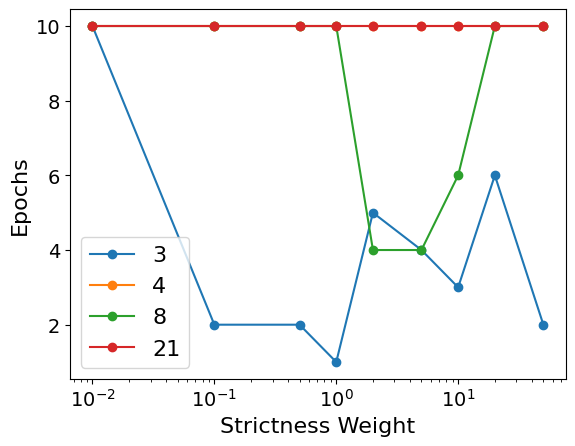

In [286]:
fig = plt.figure()
for k in strict_weights_sweep_expt.keys():
    if '24' in k:
        continue
    plot_sweep_results(
        strict_weights_sweep_expt[k],
        lambda trained_model_pair: (
            trained_model_pair["stop epoch"] 
            if trained_model_pair["stop epoch"] is not None
            else 10
        ),
        xs=strict_weights,
        x_label="Strictness Weight",
        y_label="Epochs",
        x_log_scale=True,
        fig=fig,
    )
plt.legend(strict_weights_sweep_expt.keys())
# save the figure
plt.savefig("results/strict_weights_sweep_expt_early_stop.pdf")

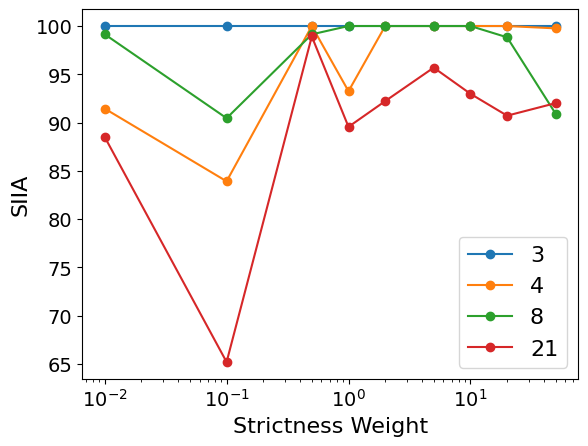

In [287]:
fig = plt.figure()
for k in strict_weights_sweep_expt.keys():
    if '24' in k:
        continue
    plot_sweep_results(
        strict_weights_sweep_expt[k],
        lambda trained_model_pair: (
            trained_model_pair["val metrics"].to_dict()["val/strict_accuracy"]
        ),
        xs=strict_weights,
        x_label="Strictness Weight",
        y_label="SIIA",
        x_log_scale=True,
        fig=fig,
    )
plt.legend(strict_weights_sweep_expt.keys())
# save as pdf
plt.savefig("results/strict_weights_sweep_expt_SIIA.pdf")

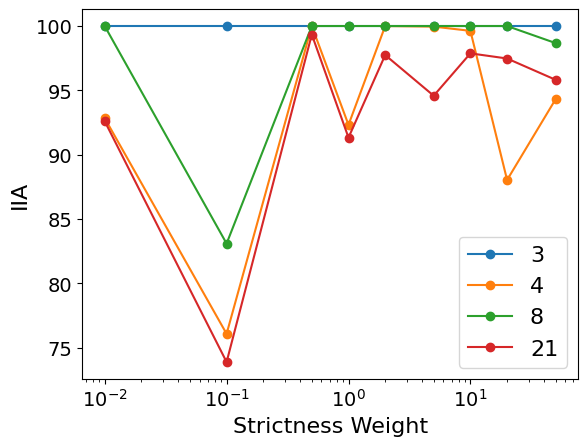

In [288]:
fig = plt.figure()
for k in strict_weights_sweep_expt.keys():
    if '24' in k:
        continue
    plot_sweep_results(
        strict_weights_sweep_expt[k],
        lambda trained_model_pair: (
            trained_model_pair["val metrics"].to_dict()["val/IIA"]
        ),
        xs=strict_weights,
        x_label="Strictness Weight",
        y_label="IIA",
        x_log_scale=True,
        fig=fig,
    )
plt.legend(strict_weights_sweep_expt.keys())
plt.savefig("results/strict_weights_sweep_expt_IIA.pdf")

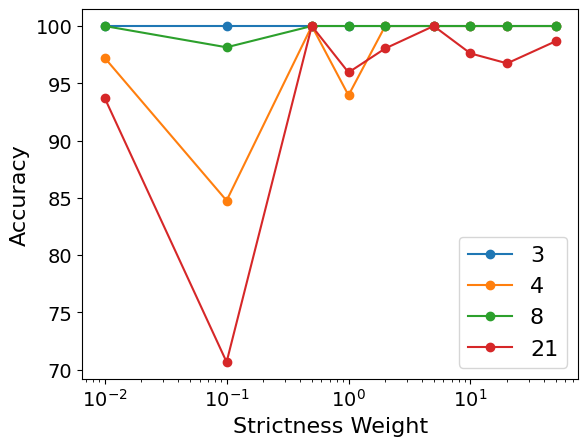

In [289]:
fig = plt.figure()
for k in strict_weights_sweep_expt.keys():
    if '24' in k:
        continue
    plot_sweep_results(
        strict_weights_sweep_expt[k],
        lambda trained_model_pair: (
            trained_model_pair["val metrics"].to_dict()["val/accuracy"]
        ),
        xs=strict_weights,
        x_label="Strictness Weight",
        y_label="Accuracy",
        x_log_scale=True,
        fig=fig,
    )
plt.legend(strict_weights_sweep_expt.keys())
plt.savefig("results/strict_weights_sweep_expt_accuracy.pdf")

In [93]:
strict_weights_sweep_expt
# convert to pandas dataframe
import pandas as pd
from interp_utils.node_stats.plotting import append_row

columns = [
    'task', 'stop epoch', 'val/SIIA', 'val/IIA', 'val/accuracy'
]



df = pd.DataFrame(columns=columns)
for k in strict_weights_sweep_expt.keys():
    for result in strict_weights_sweep_expt[k]:
        entry = pd.Series(
            {
                'task': k,
                'stop epoch': result["stop epoch"] if result["stop epoch"] is not None else 10,
                'val/SIIA': result["val metrics"].to_dict()["val/strict_accuracy"],
                'val/IIA': result["val metrics"].to_dict()["val/IIA"],
                'val/accuracy': result["val metrics"].to_dict()["val/accuracy"]
            },
        )
        df = append_row(df, entry)

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/interp_utils/common.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [94]:
df.to_csv("results/strict_weights_sweep_expt.csv")

In [153]:
sweep_result = pickle.load(open("results/seed_strict_weight_sweep_expt.pkl", "rb"))

In [154]:
sweep_result.keys()

dict_keys(['3', '4'])

In [208]:
import pandas as pd

columns = [
    'task', 'stop epoch', 'val/SIIA', 'val/IIA', 'val/accuracy'
]

def make_sweep_result_df(sweep_result):
    df = pd.DataFrame(columns=columns)
    for k in sweep_result.keys():
        for strict_weight in sweep_result[k].keys():
            for seed, result in sweep_result[k][strict_weight].items():
                entry = pd.Series(
                    {
                        'task': k,
                        'seed': seed,
                        'strict weight': float(strict_weight),
                        'stop epoch': result["stop epoch"] if result["stop epoch"] is not None else 20,
                        'val/SIIA': result["val metrics"].to_dict()["val/strict_accuracy"],
                        'val/IIA': result["val metrics"].to_dict()["val/IIA"],
                        'val/accuracy': result["val metrics"].to_dict()["val/accuracy"]
                    },
                )
                df = append_row(df, entry)
    return df

In [209]:
df = make_sweep_result_df(sweep_result)

/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/interp_utils/common.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [262]:
def plot_df(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    by="task",
    error_col: str | None = None,
    x_log_scale=True,
    y_log_scale=False,
    clip_to_100=False,
):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig = plt.figure()
    sns.lineplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=by,
        errorbar=("se", 0.5) if error_col is not None else None,
        # add markers
        marker="o",
        # set error bar alpha
        err_kws={"alpha": 0.1},
    )
    if x_log_scale:
        plt.xscale("log")
    if y_log_scale:
        plt.yscale("log")
    if clip_to_100:
        # set only maximum y limit to 100
        y_min = plt.ylim()[0]
        plt.ylim(y_min, 100.05)
    plt.legend()
    plt.show()
    return fig

In [214]:
# fig = plot_df(df, x_col="strict weight", y_col="val/SIIA", by="task", error_col="seed")

In [215]:
# fig = plot_df(df, x_col="strict weight", y_col="stop epoch", by="task", error_col="seed")

In [276]:
import os
from utils.fetch_files_from_runs import fetch_files_from_runs

fetch_files_from_runs(
    project = "SIIT_sweep",
    group = "",
    files_to_download = ["sweep_results.pkl"],
    base_path="."
)

results = {}
for task in os.listdir("./results/sweeps/"):
    results[task] = {}
    for strict_weight in os.listdir(f"./results/sweeps/{task}"):
        results[task][strict_weight] = pickle.load(open(f"./results/sweeps/{task}/{strict_weight}/sweep_results.pkl", "rb"))

df = make_sweep_result_df(results)
print(result.keys())
print(df["strict weight"].unique())

100%|██████████| 88/88 [00:11<00:00,  7.74it/s]
/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/interp_utils/common.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


dict_keys(['train metrics', 'val metrics', 'stop epoch', 'args'])
[1.e-02 5.e+01 1.e+00 5.e+00 1.e+01 4.e-01 2.e+00 5.e-01 5.e-02 2.e+01
 8.e-01 1.e-01]


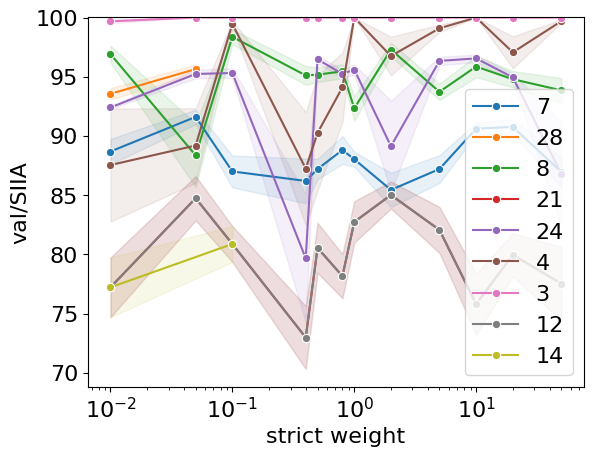

In [277]:
fig = plot_df(df, x_col="strict weight", y_col="val/SIIA", by="task", error_col="seed", clip_to_100=True)

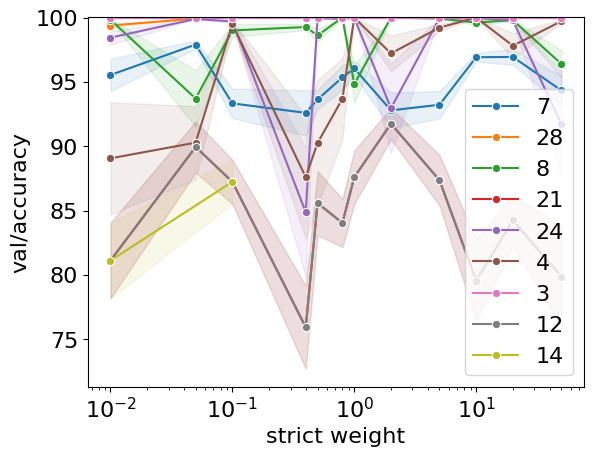

In [278]:
fig = plot_df(df, x_col="strict weight", y_col="val/accuracy", by="task", error_col="seed", clip_to_100=True)

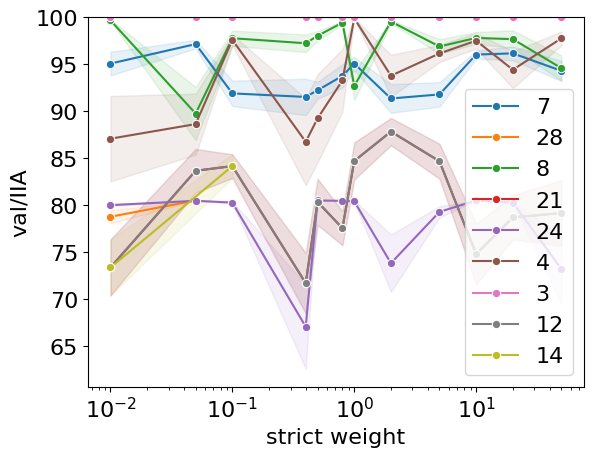

In [279]:
fig = plot_df(df, x_col="strict weight", y_col="val/IIA", by="task", error_col="seed", clip_to_100=True)

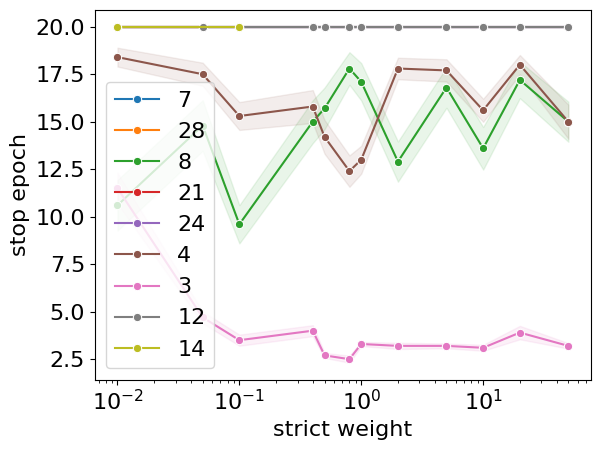

In [333]:
fig = plot_df(df, x_col="strict weight", y_col="stop epoch", by="task", error_col="seed")

Skipping 14 as it has less than 5 strict weights
Skipping 28 as it has less than 5 strict weights


/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/interp_utils/common.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


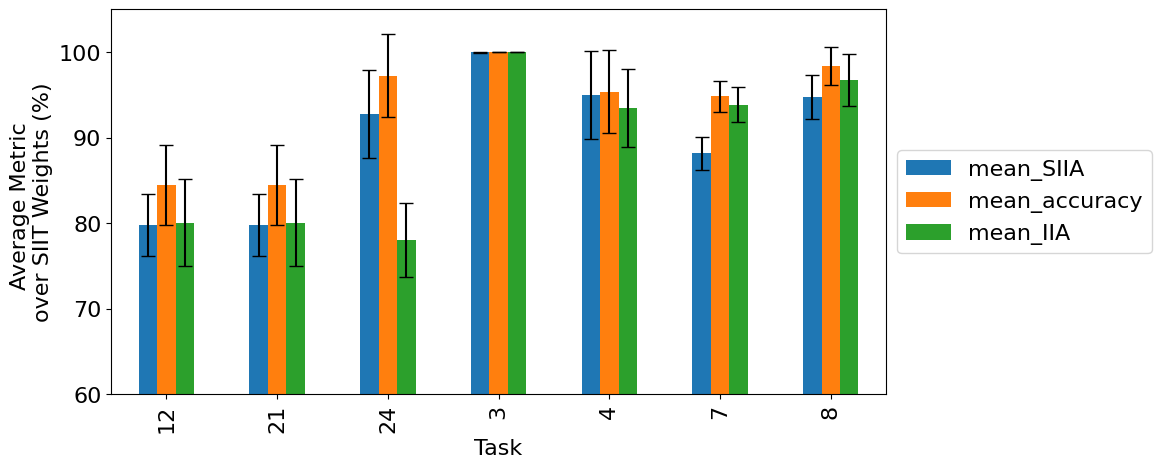

In [399]:
# get the variance and mean of the results wrt strict weight after taking the mean over seeds
df_meaned = df.groupby(["task", "strict weight"]).mean().reset_index()

stats_across_weights = pd.DataFrame(columns=["task", "mean_SIIA", "std_SIIA", "mean_accuracy", "std_accuracy", "mean_IIA", "std_IIA" ])

for task in df_meaned["task"].unique():
    task_df = df_meaned[df_meaned["task"] == task]
    if len(task_df) < 5:
        print(f"Skipping {task} as it has less than 5 strict weights")
        continue
    mean_SIIA = task_df["val/SIIA"].mean()
    std_SIIA = task_df["val/SIIA"].std()
    mean_accuracy = task_df["val/accuracy"].mean()
    std_accuracy = task_df["val/accuracy"].std()
    mean_IIA = task_df["val/IIA"].mean()
    std_IIA = task_df["val/IIA"].std()

    stats_across_weights = append_row(
        stats_across_weights,
        pd.Series(
            {
                "task": task,
                "mean_SIIA": mean_SIIA,
                "std_SIIA": std_SIIA,
                "mean_accuracy": mean_accuracy,
                "std_accuracy": std_accuracy,
                "mean_IIA": mean_IIA,
                "std_IIA": std_IIA
            }
        )
    )

stats_across_weights.plot.bar(x="task", y=["mean_SIIA", "mean_accuracy", "mean_IIA"], yerr=[stats_across_weights["std_SIIA"], stats_across_weights["std_accuracy"], stats_across_weights["std_IIA"]], capsize=5)
# legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plot size
plt.gcf().set_size_inches(10, 5)
plt.ylim(60, 105)

plt.xlabel("Task")
plt.ylabel("Average Metric \nover SIIT Weights (%)")

plt.savefig("results/mean_metrics_across_weights_all_cases.pdf", bbox_inches='tight')

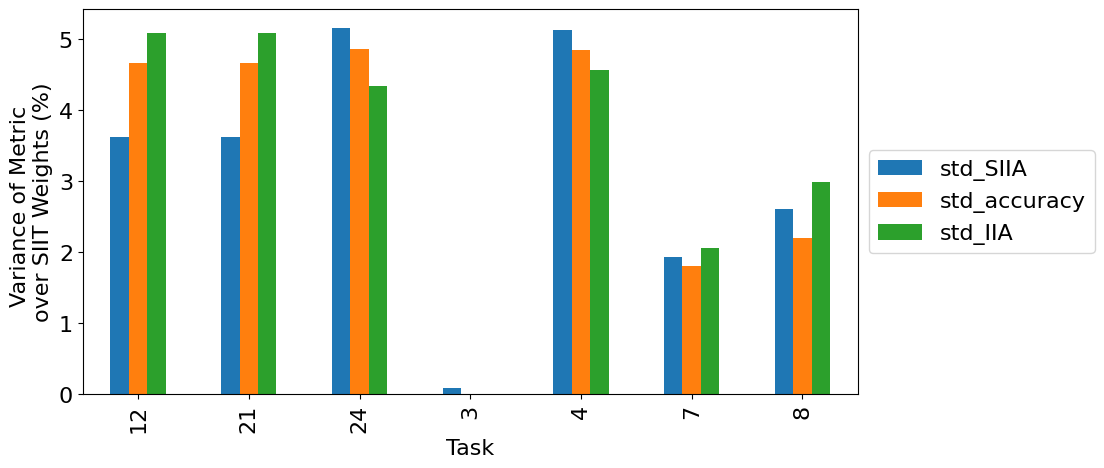

In [400]:
stats_across_weights.plot.bar(x="task", y=["std_SIIA", "std_accuracy", "std_IIA"], capsize=5)
# legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plot size
plt.gcf().set_size_inches(10, 5)
# plt.ylim(60, 105)

plt.xlabel("Task")
plt.ylabel("Variance of Metric \nover SIIT Weights (%)")
plt.savefig("results/variance_metrics_across_weights_all_cases.pdf", bbox_inches='tight')

In [379]:
variance_df = pd.DataFrame(columns=["task", "strict_weight", "mean_SIIA", "std_SIIA", "mean_accuracy", "std_accuracy", "mean_IIA", "std_IIA"])

for task in df["task"].unique():
    task_df = df.groupby("task").get_group(task)
    strict_weights = task_df["strict weight"].unique()
    if len(strict_weights) < 5:
        print(f"Skipping {task} as it has less than 5 strict weights")
        continue
    for strict_weight in strict_weights:
        group = task_df.groupby("strict weight").get_group(strict_weight)
        variance_df = append_row(
            variance_df,
            pd.Series(
                {
                    "task": task,
                    "strict_weight": strict_weight,
                    "mean_SIIA": group["val/SIIA"].mean(),
                    "std_SIIA": group["val/SIIA"].std(),
                    "mean_accuracy": group["val/accuracy"].mean(),
                    "std_accuracy": group["val/accuracy"].std(),
                    "mean_IIA": group["val/IIA"].mean(),
                    "std_IIA": group["val/IIA"].std(),
                }
            )
        )
    


Skipping 28 as it has less than 5 strict weights
Skipping 14 as it has less than 5 strict weights


/Users/cybershiptrooper/src/interpretability/MATS/circuits-benchmark/notebooks/interp_utils/common.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [329]:
variance_df["std_SIIA"].mean().__round__(2), variance_df["std_accuracy"].mean().__round__(2), variance_df["std_IIA"].mean().__round__(2)

(8.56, 8.34, 9.01)

In [394]:
(variance_df["task"] == '3' or variance_df["task"] == '4' or variance_df["task"] == '21' or variance_df["task"] == '8').any

0     False
1     False
2     False
3     False
4     False
      ...  
79    False
80    False
81    False
82    False
83    False
Name: task, Length: 84, dtype: bool

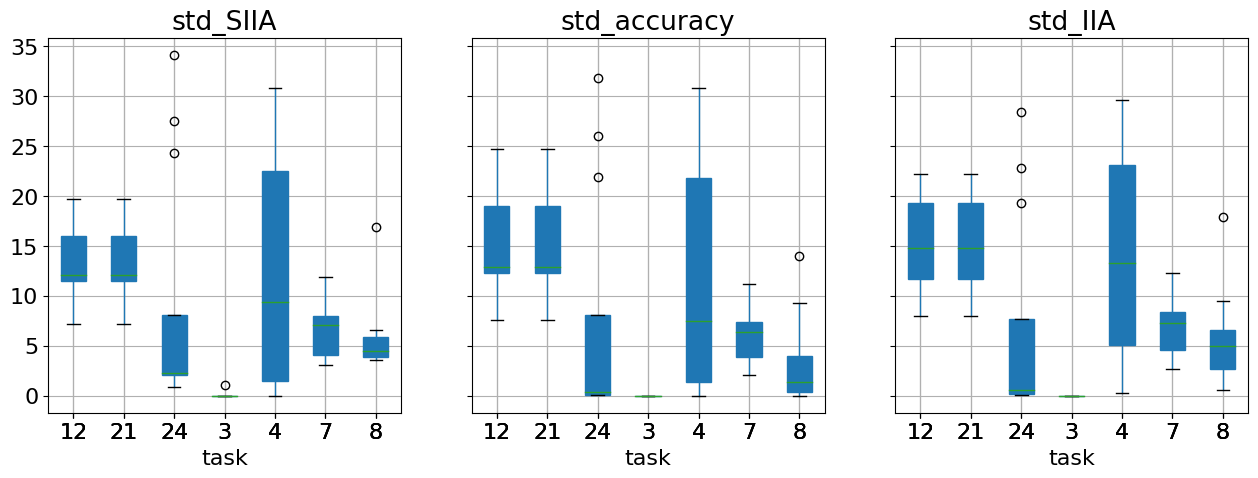

In [398]:
fig = variance_df.boxplot(
    column=["std_SIIA", "std_accuracy", "std_IIA"], 
    by="task",
    layout=(1, 3),
    # fill color
    patch_artist=True,
)
plt.suptitle("")
# fig size
plt.gcf().set_size_inches(15, 5)
plt.savefig("results/strict_weight_seed_variance_all_cases.pdf")

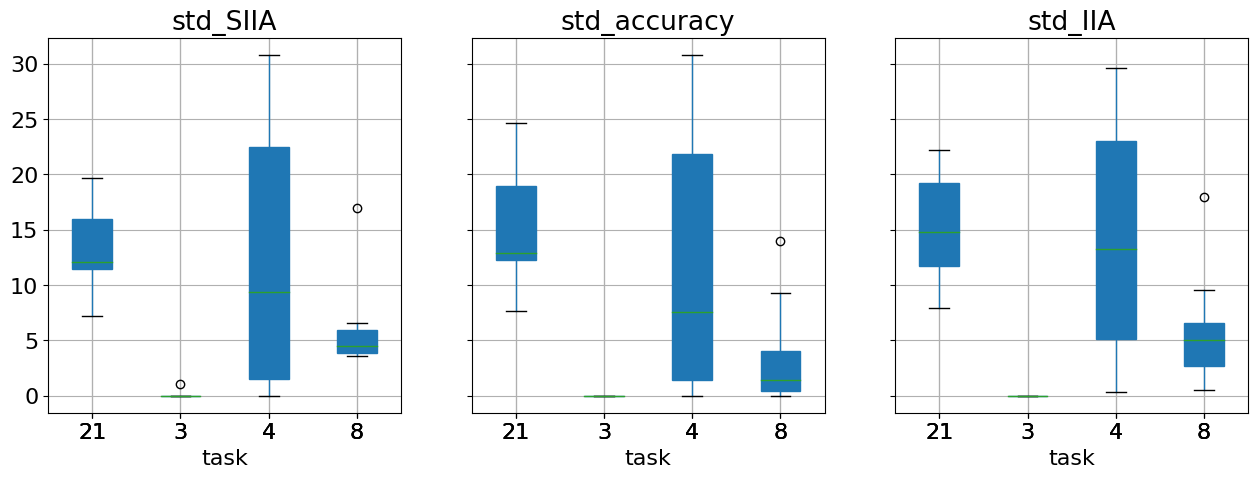

In [397]:
selected_variance_df = variance_df[(variance_df["task"] == '3') | (variance_df["task"] == '4') | (variance_df["task"] == '21') | (variance_df["task"] == '8')]
fig = selected_variance_df.boxplot(
    column=["std_SIIA", "std_accuracy", "std_IIA"], 
    by="task",
    layout=(1, 3),
    # fill color
    patch_artist=True,
)
plt.suptitle("")
# fig size
plt.gcf().set_size_inches(15, 5)
plt.savefig("results/strict_weight_seed_variance.pdf")

In [340]:
best = variance_df.sort_values(by=['mean_IIA','strict_weight']).groupby("task").apply(lambda x: x.loc[x["mean_SIIA"].idxmax()]).reset_index(drop=True).round(2)
# remove the task column where length of strict_weight < 3
for task in best["task"].unique():
    if len(variance_df[variance_df["task"] == task]) < 5:
        print(f"removing {task}, length = {len(variance_df[variance_df['task'] == task])}")
        best = best[best["task"] != task]
best.to_csv("results/best_strict_weight_variance_all_cases.csv", index=False)

best

removing 14, length = 2
removing 28, length = 2


/var/folders/_k/_46xyqdj165bdcyw79k6758w0000gn/T/ipykernel_87571/3930808590.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = variance_df.sort_values(by=['mean_IIA','strict_weight']).groupby("task").apply(lambda x: x.loc[x["mean_SIIA"].idxmax()]).reset_index(drop=True).round(2)


,task,strict_weight,mean_SIIA,std_SIIA,mean_accuracy,std_accuracy,mean_IIA,std_IIA
0,12,2.00,85.02,7.22,91.75,7.63,87.84,9.17
2,21,2.00,85.02,7.22,91.75,7.63,87.84,9.17
3,24,10.00,96.55,2.01,99.95,0.07,80.50,0.09
5,3,0.05,100.00,0.00,100.00,0.00,100.00,0.00
6,4,1.00,100.00,0.00,100.00,0.00,99.90,0.31
7,7,0.05,91.61,3.88,97.90,2.09,97.16,2.88
8,8,0.10,98.37,3.90,99.00,3.16,97.78,5.09


In [342]:
variance_df.to_csv("results/strict_weight_variance.csv", index=False)

In [384]:
df.to_csv("results/strict_weight_seed_sweep.csv", index=False)